In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.dates as mdates

In [6]:
def parse_date(str):
    s = str.replace('오전', 'am').replace('오후', 'pm')
    return datetime.strptime(s, '%Y-%m-%d %p %I:%M:%S')

In [31]:
units = pd.DataFrame()

for idx in range(0, 4):
    unit0 = pd.read_csv(f'./data/cheonan_unit_total_w1/cheonan_unit{idx}_total.csv', encoding='euc-kr', parse_dates=['DATE'], date_parser=parse_date)
    unit0 = unit0[['DATE', 'CO2', 'VOC', 'TEMP', 'HUMID', 'PARTICLE']]
    unit0['DEVICE'] = f'DEV{idx}'
    unit0['d_truncated'] = unit0['DATE'].apply(lambda x: datetime(x.year, x.month, x.day))
    unit0.sort_values('DATE', inplace=True)
    print(f'{idx}: {unit0.shape}')
    units = pd.concat([units, unit0], ignore_index=True)

print(units.head())
print(units.tail())
print(f'{units.shape}')

C:\Users\tak\AppData\Local\Temp\ipykernel_31620\1339028903.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  unit0 = pd.read_csv(f'./data/cheonan_unit_total_w1/cheonan_unit{idx}_total.csv', encoding='euc-kr', parse_dates=['DATE'], date_parser=parse_date)


0: (10657, 8)


C:\Users\tak\AppData\Local\Temp\ipykernel_31620\1339028903.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  unit0 = pd.read_csv(f'./data/cheonan_unit_total_w1/cheonan_unit{idx}_total.csv', encoding='euc-kr', parse_dates=['DATE'], date_parser=parse_date)


1: (11273, 8)
2: (11286, 8)


C:\Users\tak\AppData\Local\Temp\ipykernel_31620\1339028903.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  unit0 = pd.read_csv(f'./data/cheonan_unit_total_w1/cheonan_unit{idx}_total.csv', encoding='euc-kr', parse_dates=['DATE'], date_parser=parse_date)
C:\Users\tak\AppData\Local\Temp\ipykernel_31620\1339028903.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  unit0 = pd.read_csv(f'./data/cheonan_unit_total_w1/cheonan_unit{idx}_total.csv', encoding='euc-kr', parse_dates=['DATE'], date_parser=parse_date)


3: (11286, 8)
                 DATE  CO2  VOC  TEMP  HUMID  PARTICLE DEVICE d_truncated
0 2024-08-22 00:00:20  0.4    6  26.8   43.8       0.0   DEV0  2024-08-22
1 2024-08-22 00:01:14  0.4    6  26.8   43.8       0.0   DEV0  2024-08-22
2 2024-08-22 00:01:59  0.4    5  26.9   43.8       0.0   DEV0  2024-08-22
3 2024-08-22 00:02:54  0.4   10  26.8   43.8       0.0   DEV0  2024-08-22
4 2024-08-22 00:03:48  0.4    4  26.8   43.8       0.0   DEV0  2024-08-22
                     DATE   CO2  VOC  TEMP  HUMID  PARTICLE DEVICE d_truncated
44497 2024-08-28 10:40:46  0.47  157  22.7   56.0       0.0   DEV3  2024-08-28
44498 2024-08-28 10:41:40  0.47  149  22.6   56.0       0.0   DEV3  2024-08-28
44499 2024-08-28 10:42:35  0.48  153  22.7   56.1       0.0   DEV3  2024-08-28
44500 2024-08-28 10:43:29  0.50  166  22.7   56.2       0.0   DEV3  2024-08-28
44501 2024-08-28 10:44:23  0.48  157  22.7   56.2       0.0   DEV3  2024-08-28
(44502, 8)


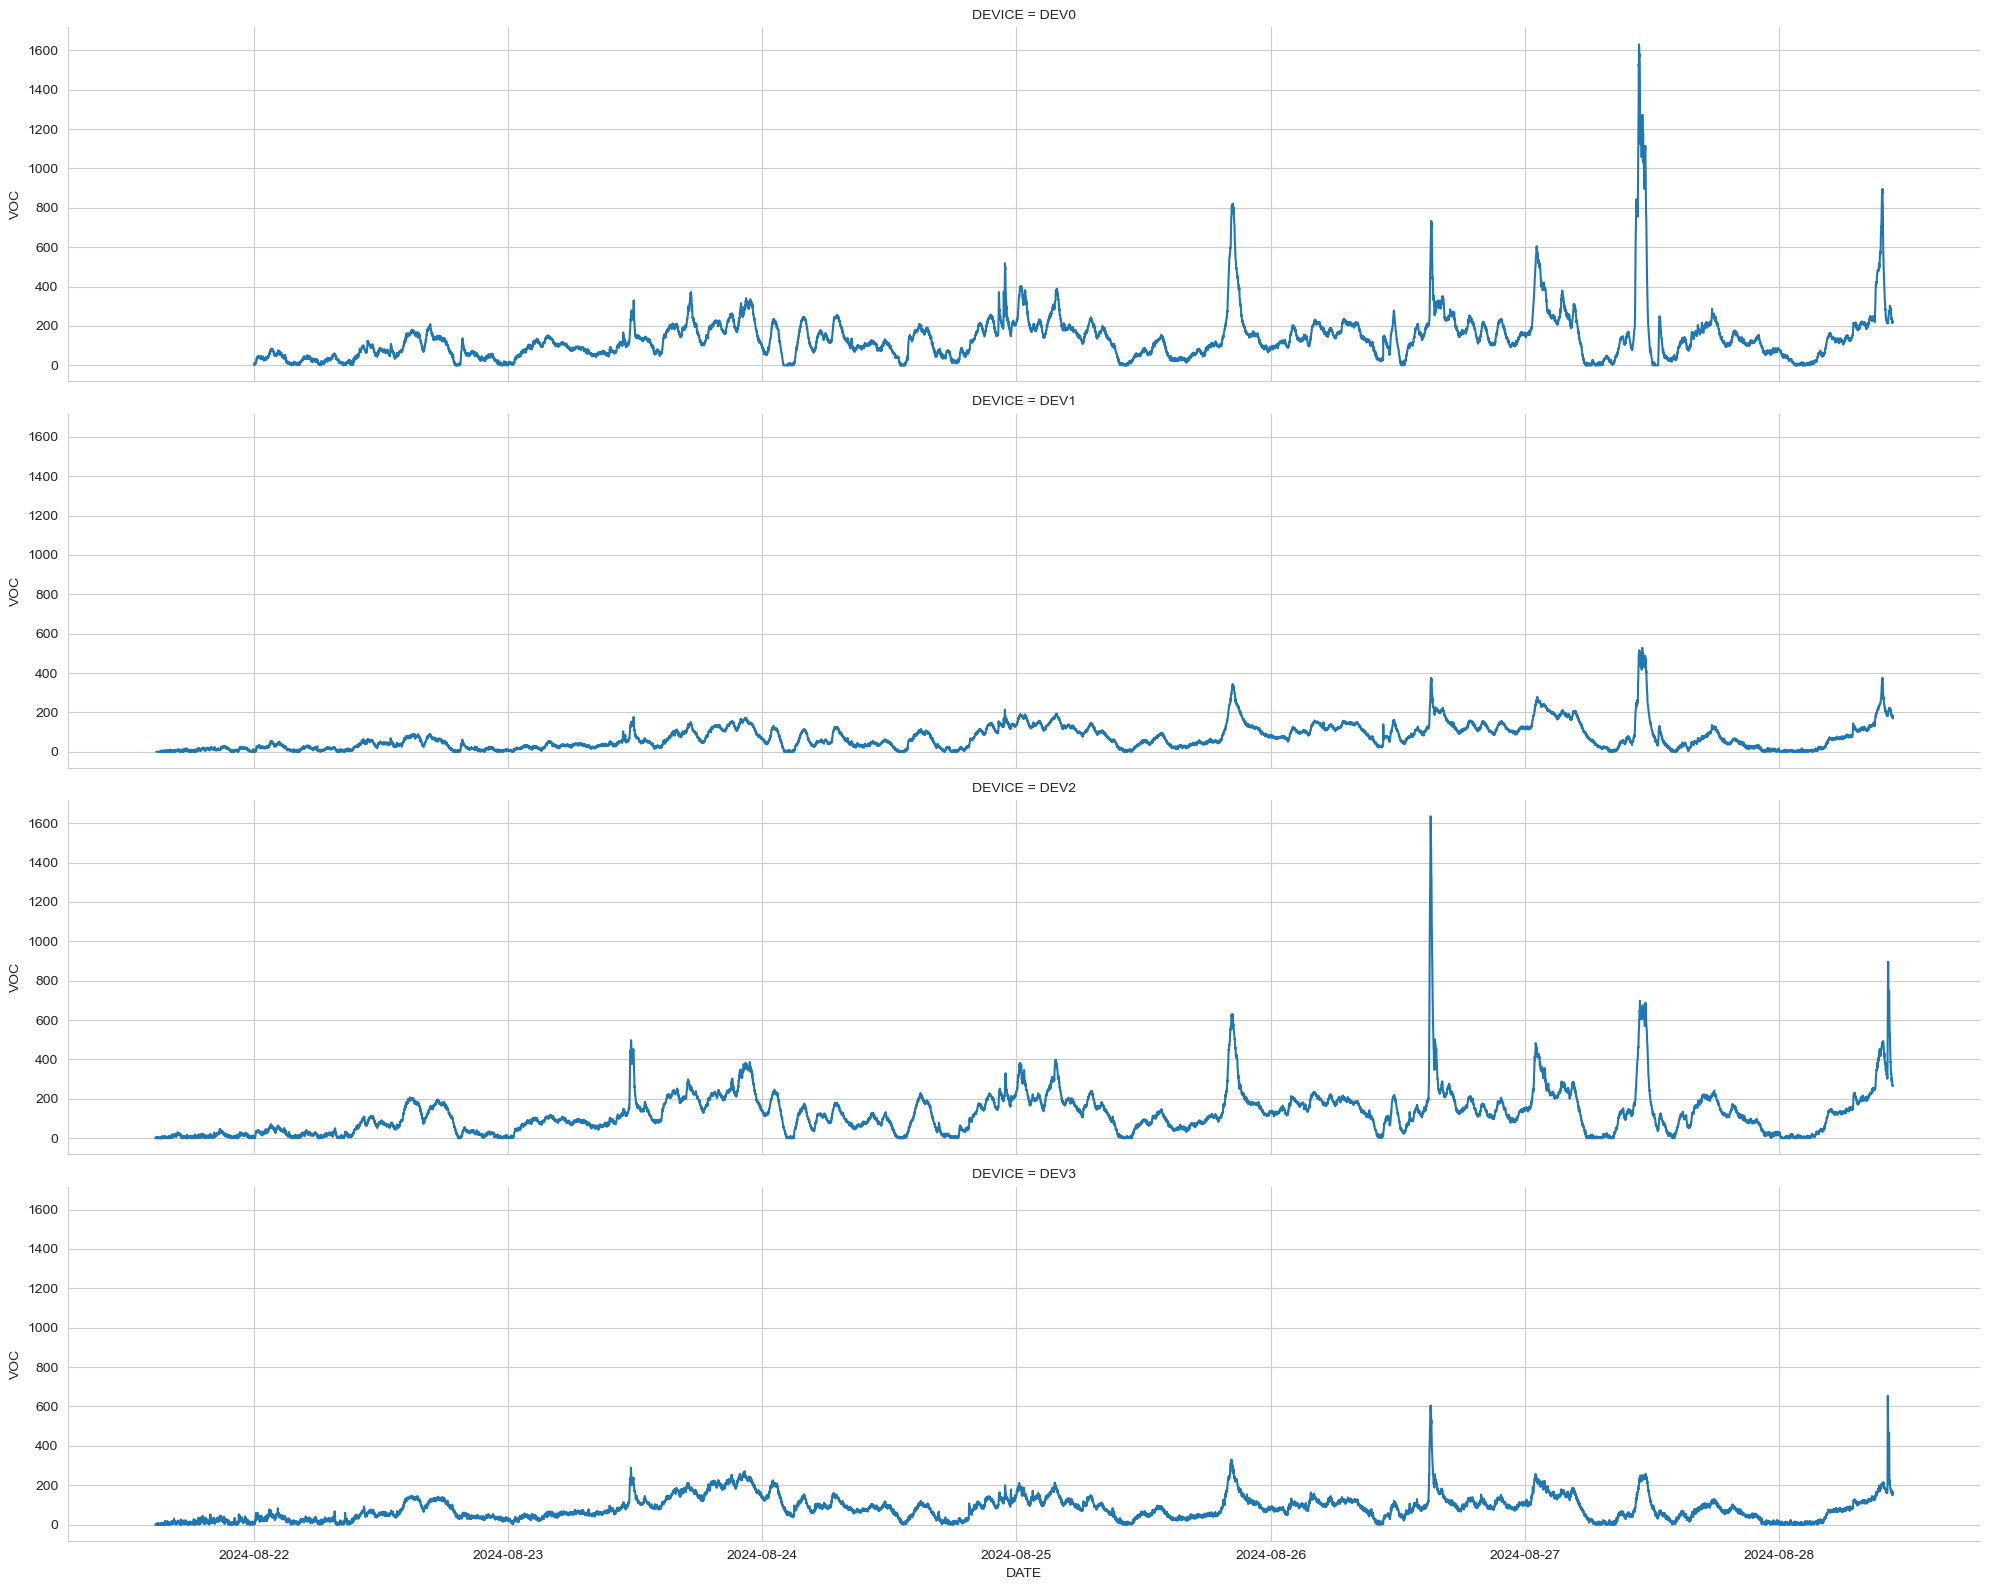

In [49]:
# 이상치를 설정할 때, 센서별로 설정하는가? 학습이 하나의 값 (etc. 1.5)만 설정하는가?
sns.set_style('whitegrid')
g = sns.relplot(
    data=units, kind='line',
    x='DATE', y='VOC',
    row='DEVICE',
    height=4, aspect=5,
    # facet_kws=dict(sharex=False),
)

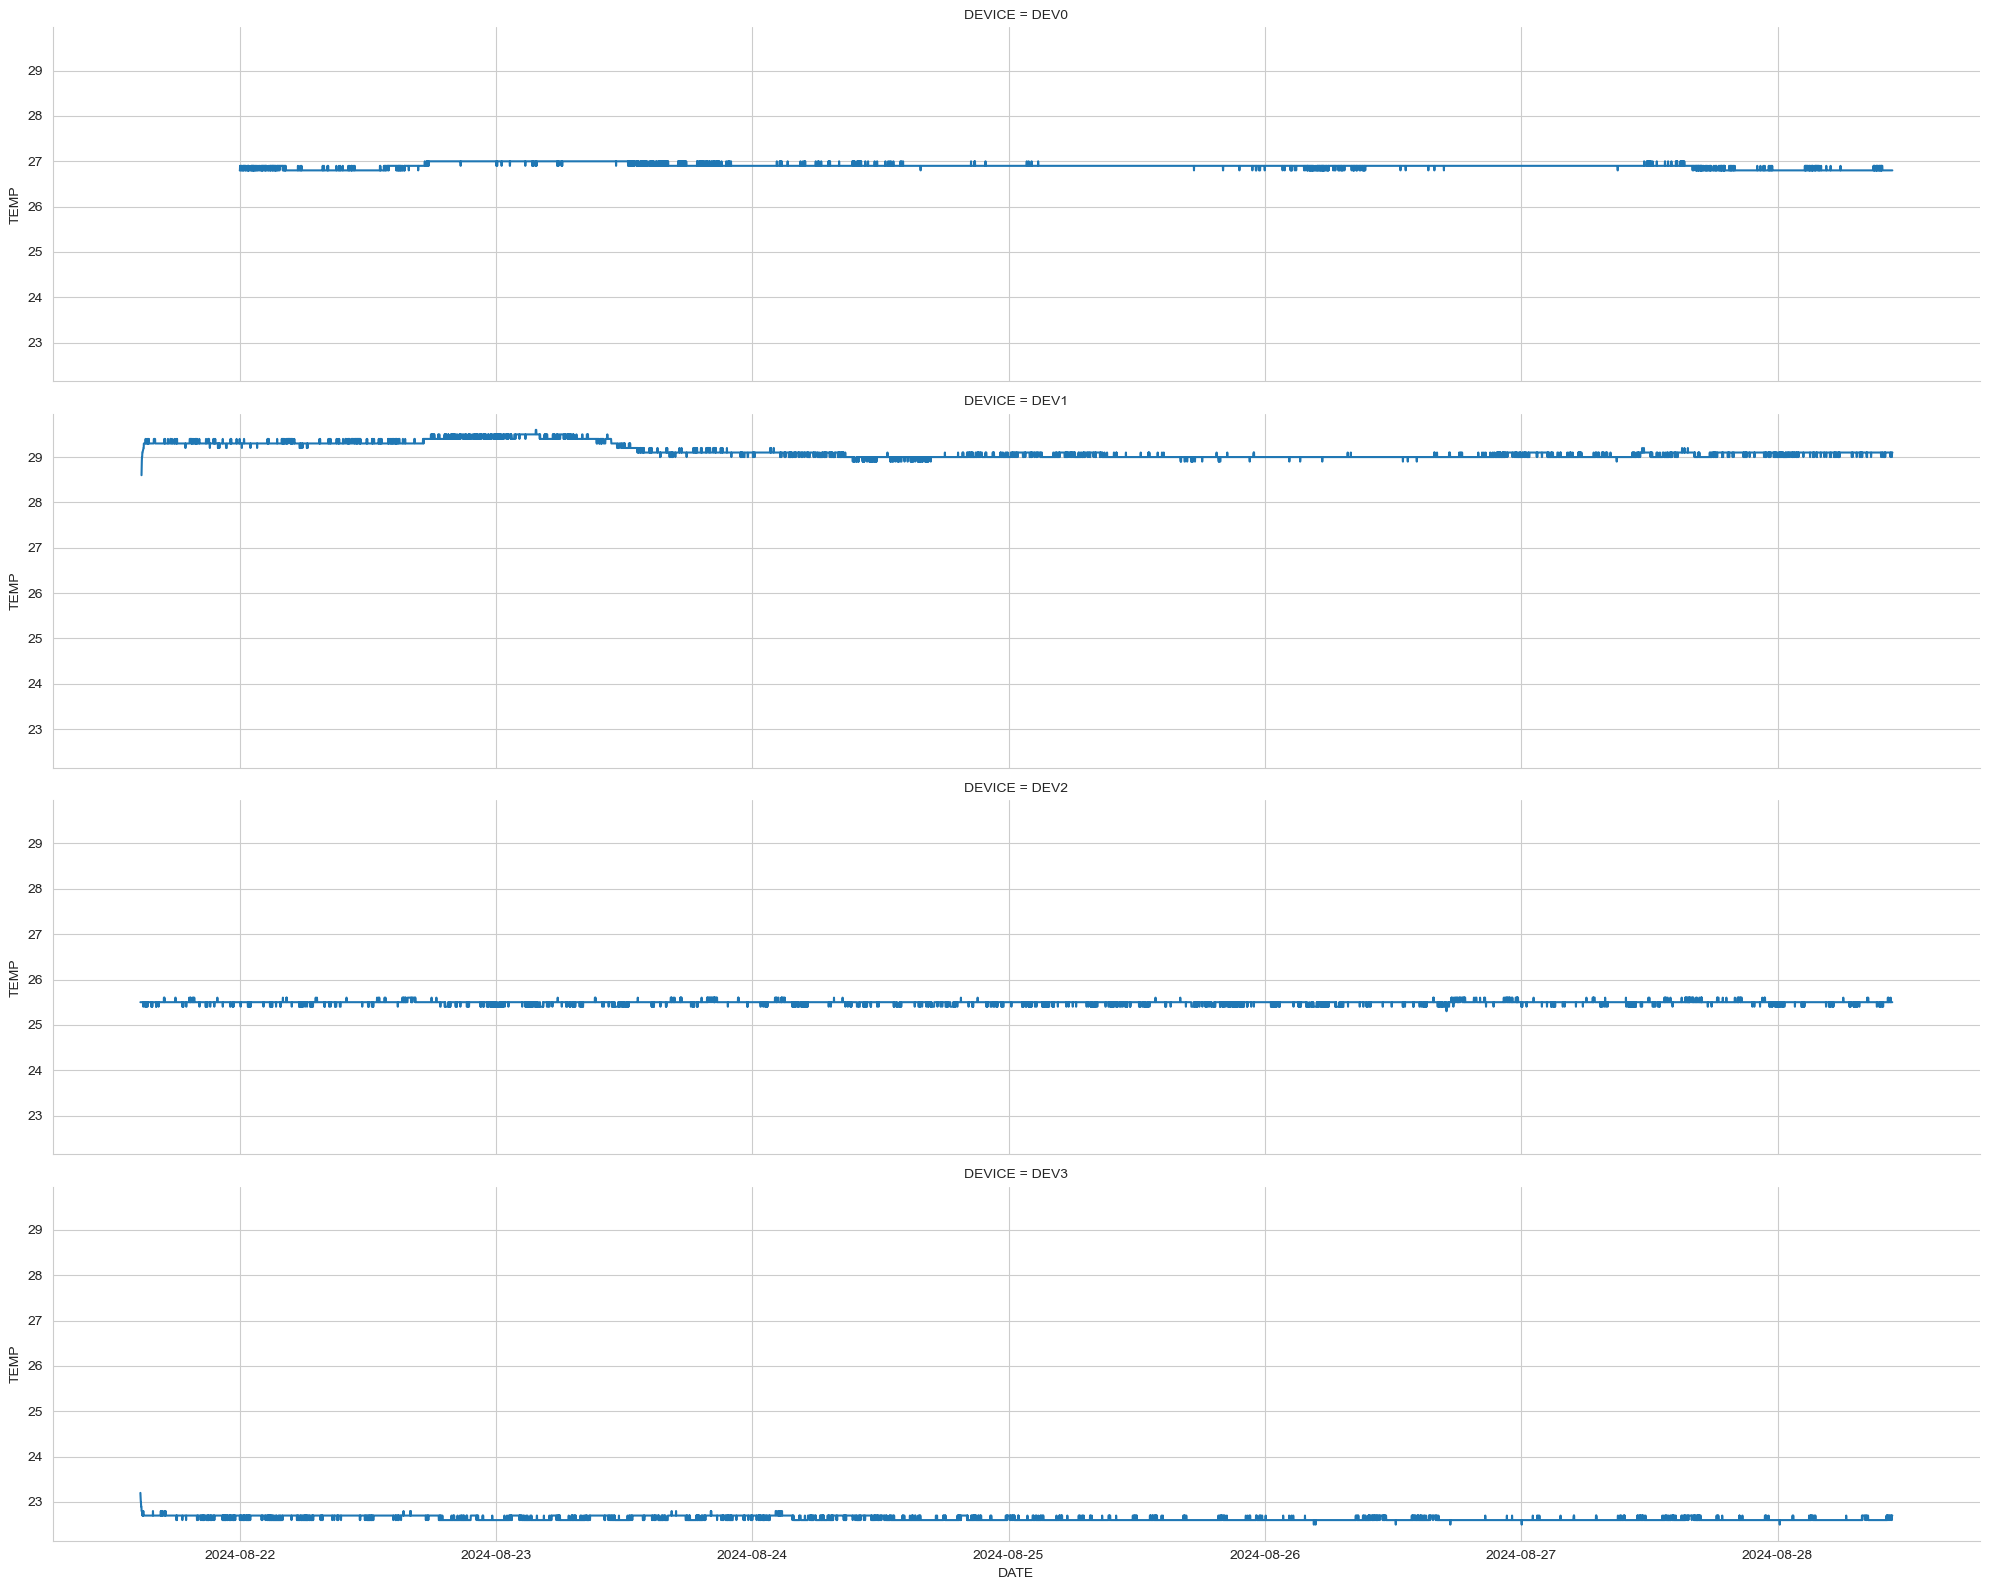

In [53]:
# 이상치를 설정할 때, 센서별로 설정하는가? 학습이 하나의 값 (etc. 1.5)만 설정하는가?
sns.set_style('whitegrid')
g = sns.relplot(
    data=units, kind='line',
    x='DATE', y='TEMP',
    row='DEVICE',
    height=4, aspect=5,
    # facet_kws=dict(sharex=False),
)

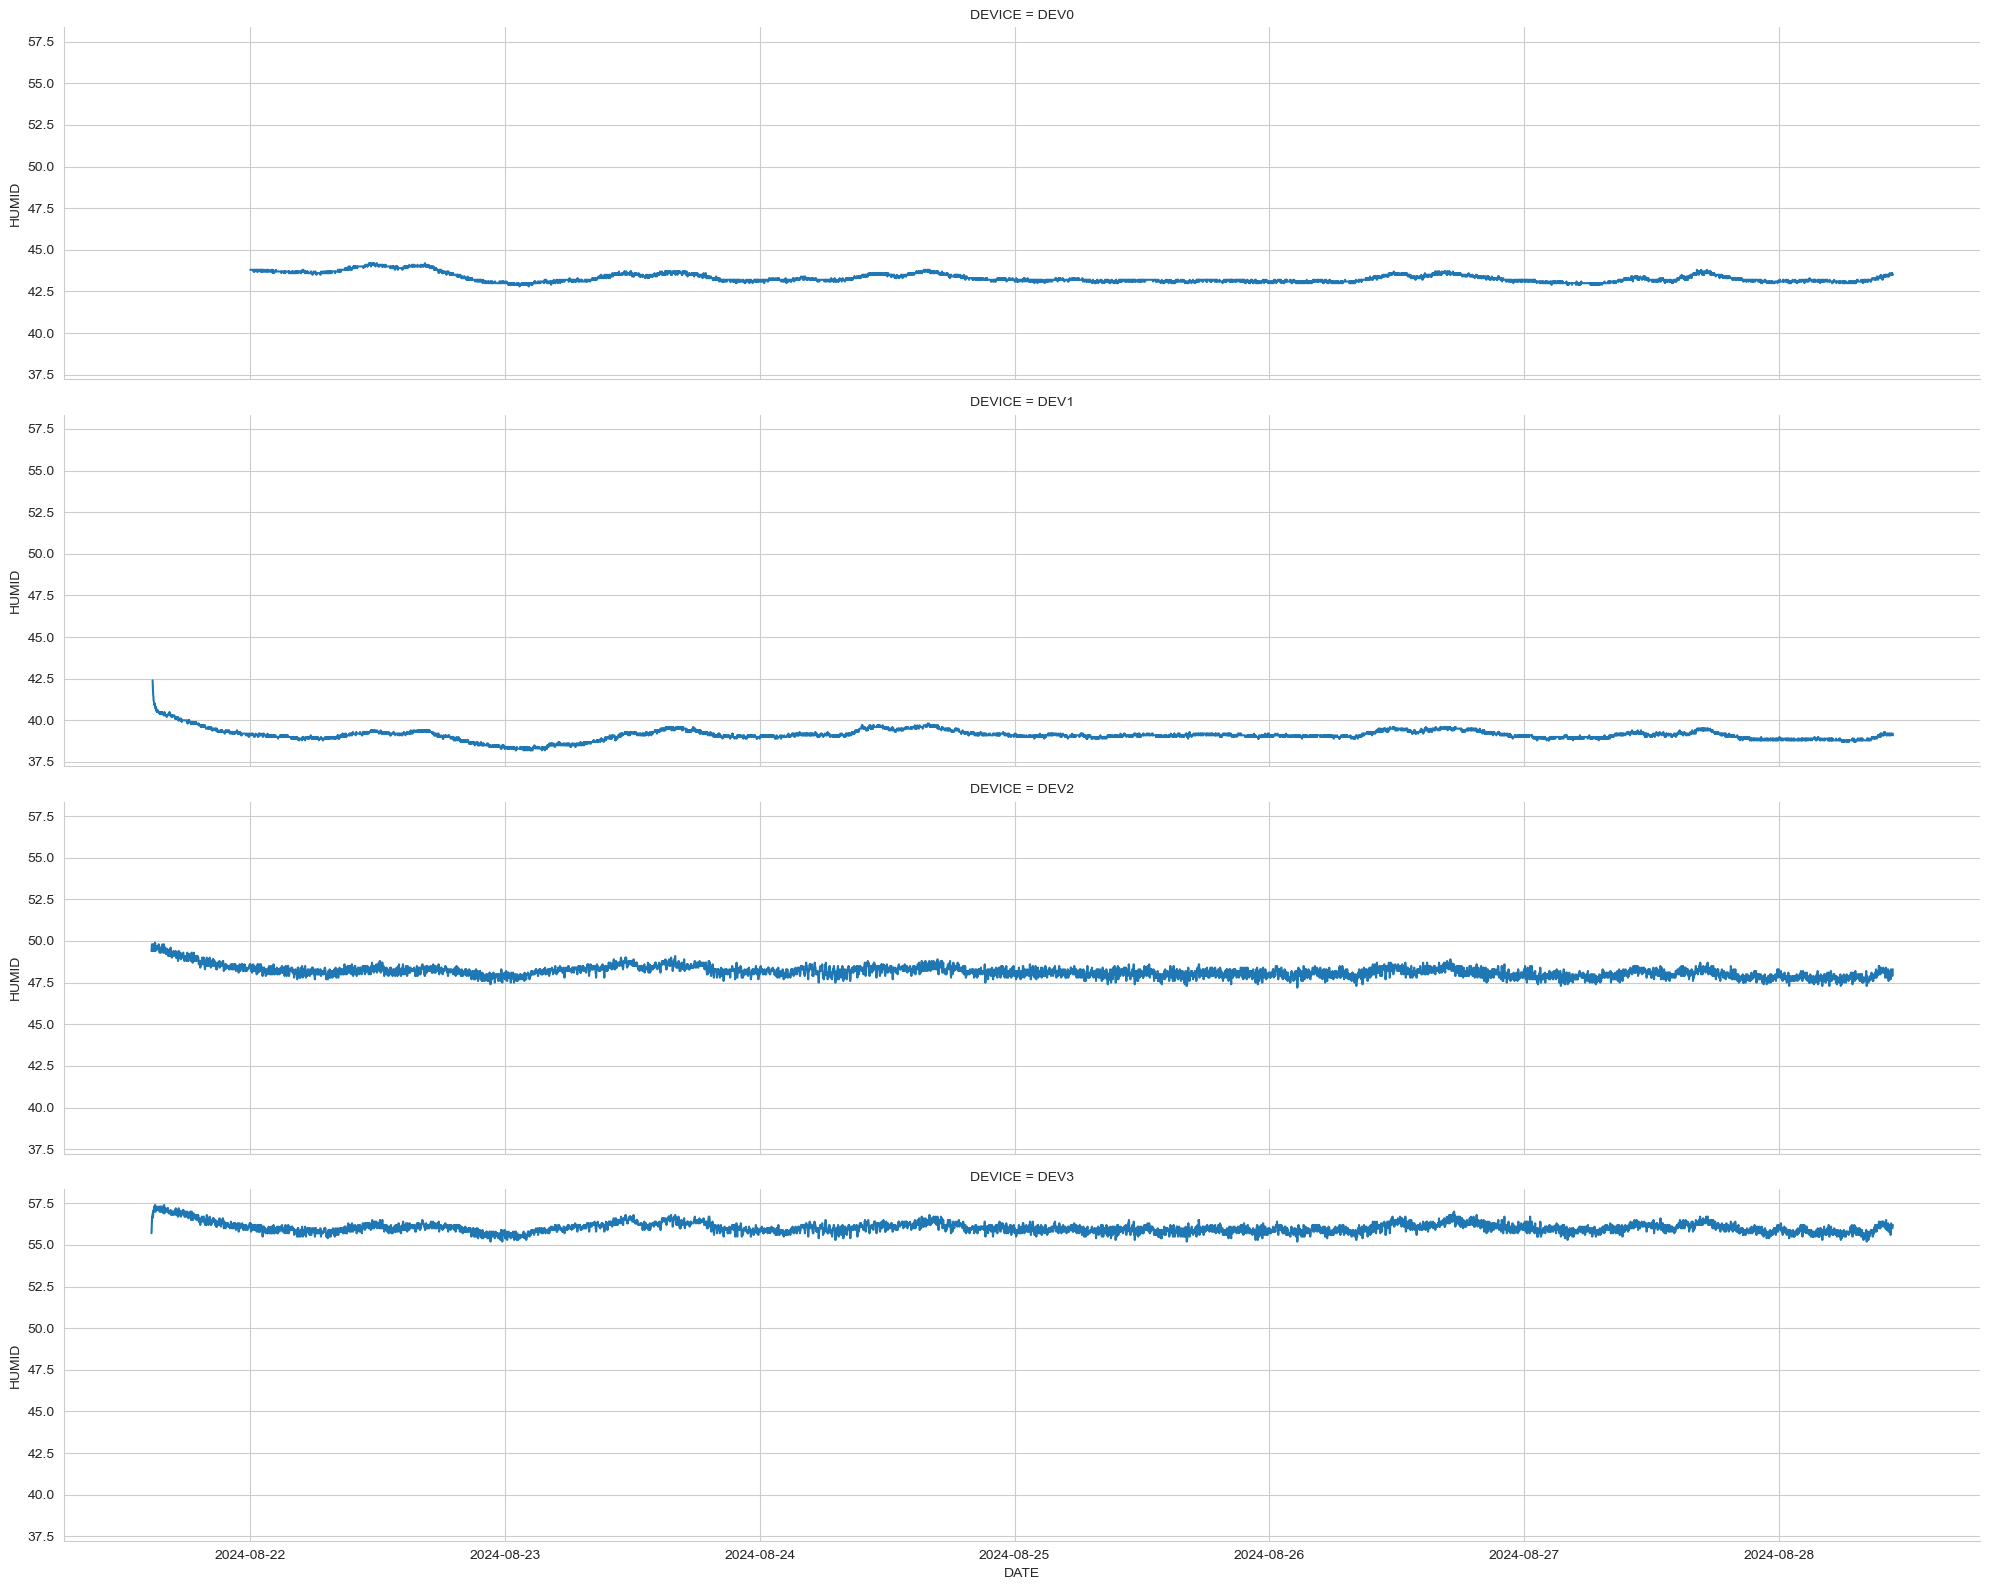

In [54]:
# 이상치를 설정할 때, 센서별로 설정하는가? 학습이 하나의 값 (etc. 1.5)만 설정하는가?
sns.set_style('whitegrid')
g = sns.relplot(
    data=units, kind='line',
    x='DATE', y='HUMID',
    row='DEVICE',
    height=4, aspect=5,
    # facet_kws=dict(sharex=False),
)

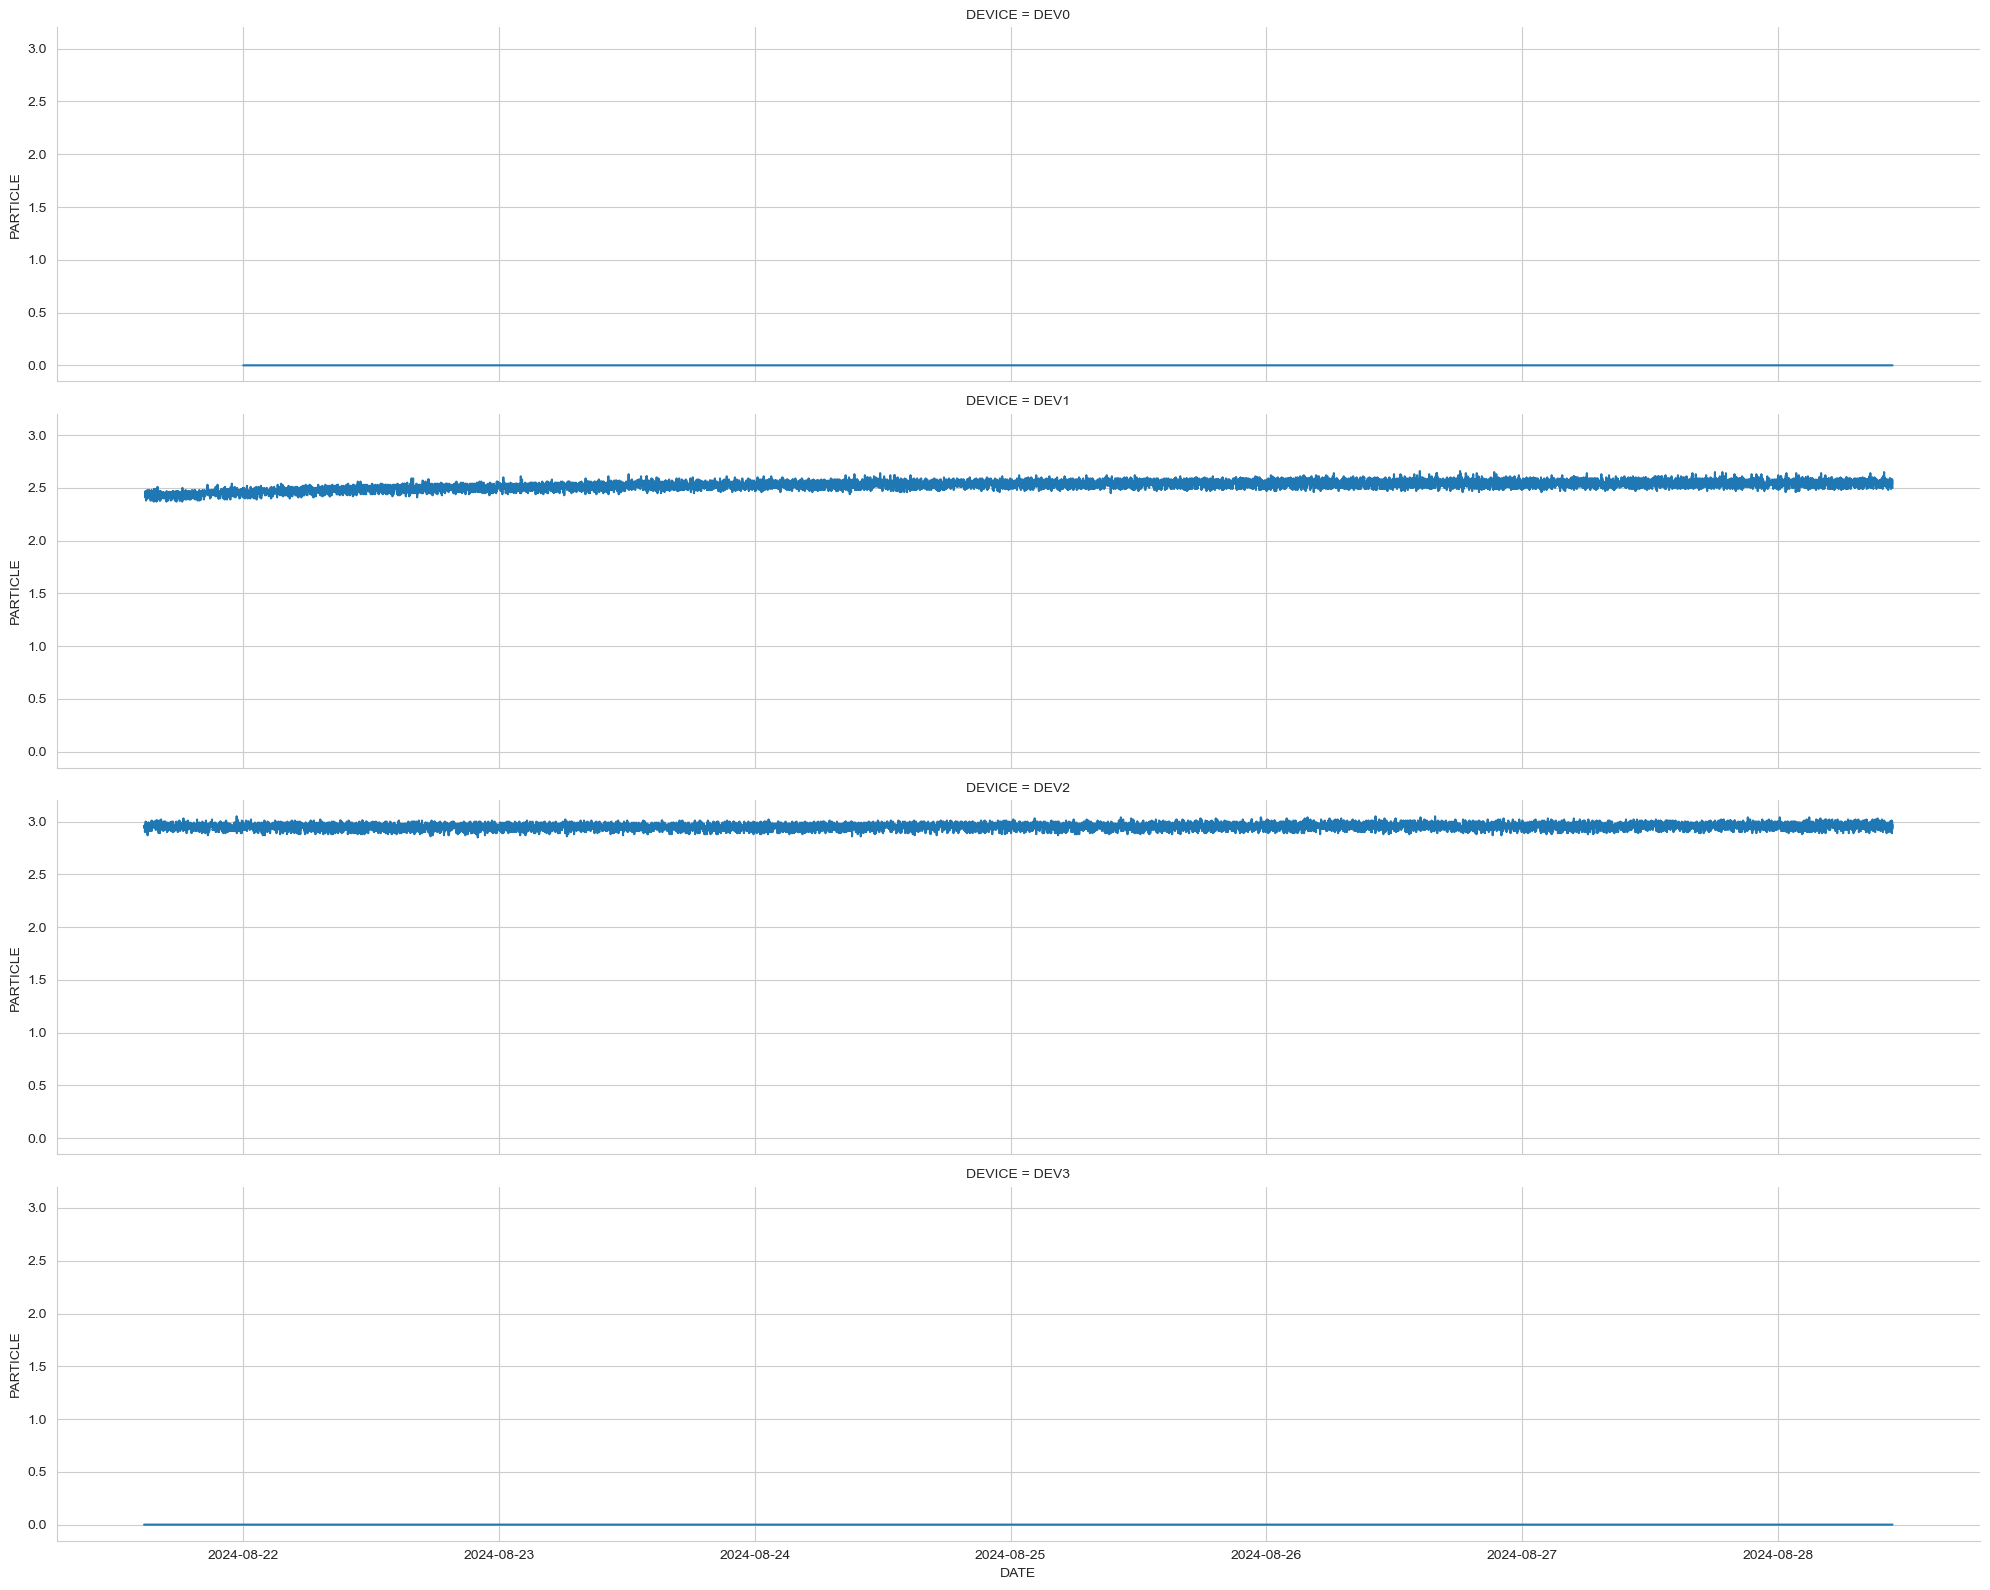

In [55]:
# 이상치를 설정할 때, 센서별로 설정하는가? 학습이 하나의 값 (etc. 1.5)만 설정하는가?
sns.set_style('whitegrid')
g = sns.relplot(
    data=units, kind='line',
    x='DATE', y='PARTICLE',
    row='DEVICE',
    height=4, aspect=5,
    # facet_kws=dict(sharex=False),
)

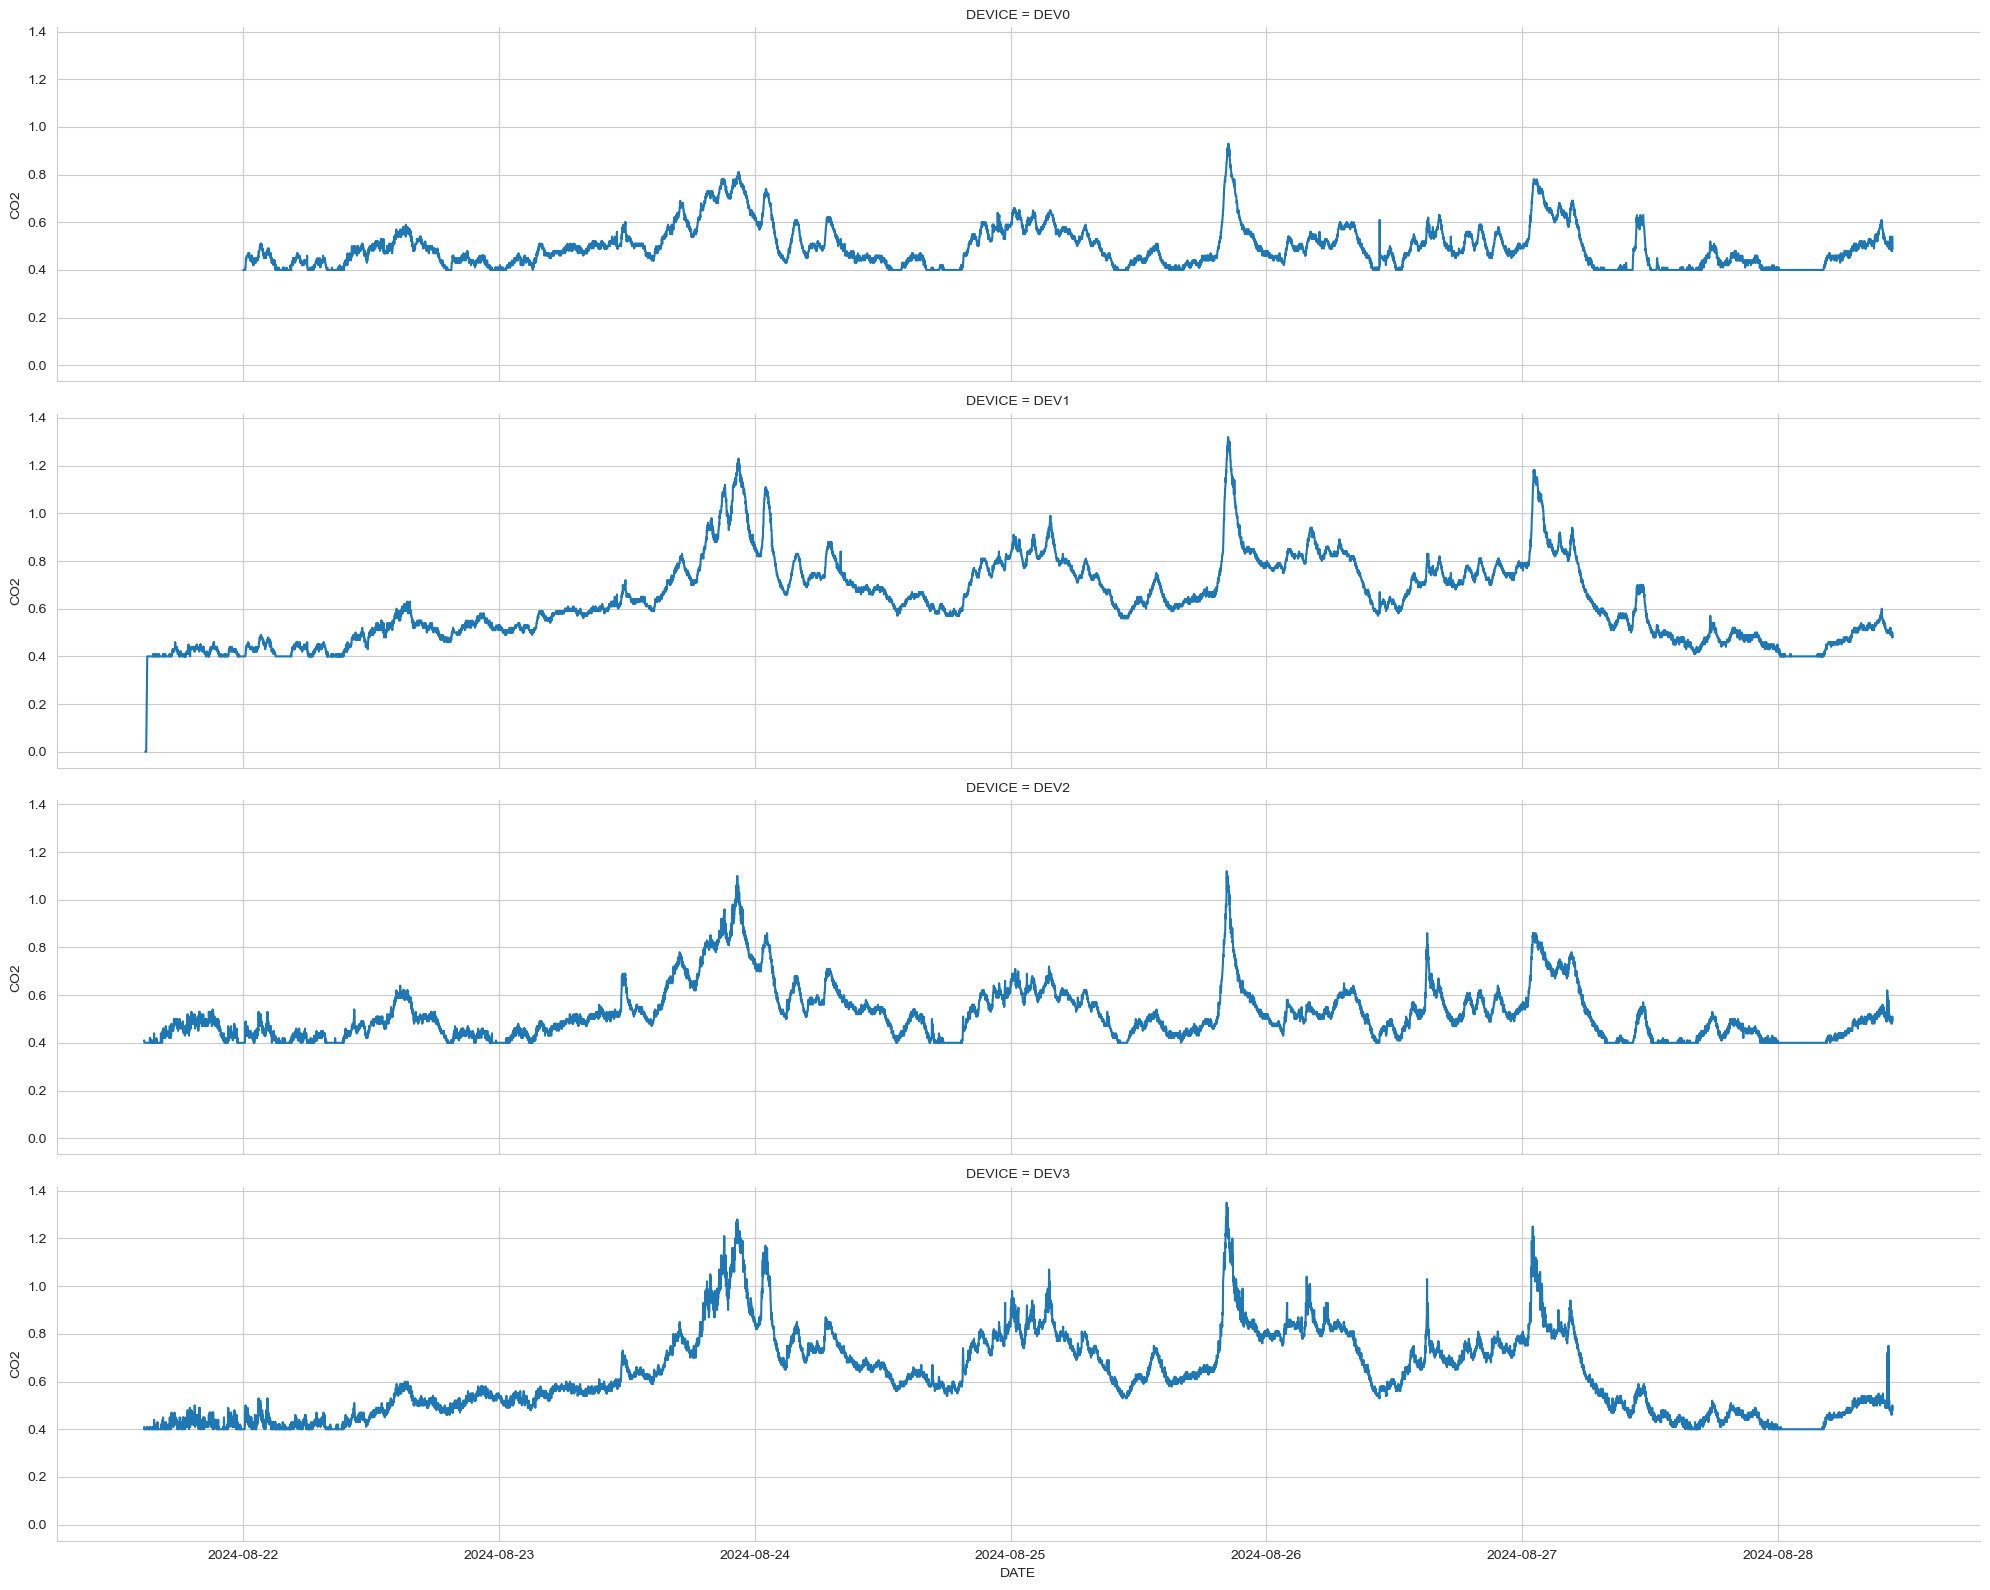

In [56]:
g = sns.relplot(
    data=units, kind='line',
    x='DATE', y='CO2',
    row='DEVICE',
    height=4, aspect=5,
    # facet_kws=dict(sharex=False),
)